<a href="https://colab.research.google.com/github/MehrabHussain47/Problem-Solving/blob/master/_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization_Assignment

Problem: Use the Bollywood Dataset to Answer Questions 1 to 12.

The data file bollywood.csv contains box office collection and social media promotion information about  movies released in 2013−2015 period. Following are the columns and their descriptions.

▪ SlNo – Release Date

▪ MovieName – Name of the movie

▪ ReleaseTime – Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal)

▪ Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc.

▪ Budget – Movie creation budget

▪ BoxOfficeCollection – Box office collection

▪ YoutubeViews – Number of views of the YouTube trailers

▪ YoutubeLikes – Number of likes of the YouTube trailers

▪ YoutubeDislikes – Number of dislikes of the YouTube trailers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Use Python code to answer the following questions:**

1. How many records are present in the dataset? Print the metadata information of the dataset.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bollywood.csv to bollywood.csv


In [4]:
df = pd.read_csv('bollywood.csv')
df

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,TableNo.21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,RajdhaniExpress,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,DumLagaKeHaisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,DilliwaliZaalimGirlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [7]:
print("Number of records:", len(df))
print("\nMetadata Information:")
df.info()

Number of records: 149

Metadata Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   ReleaseDate          149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [12]:
genre_counts = df['Genre'].value_counts()
print(genre_counts)
print("\nGenre with highest releases:", genre_counts.idxmax())

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

Genre with highest releases: Comedy


3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [15]:
cross_tab = pd.crosstab(df['Genre'], df['ReleaseTime'])
print(cross_tab)

ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [23]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['Month'] = df['ReleaseDate'].dt.month
month_counts = df['Month'].value_counts().sort_index()
print(month_counts)
print("\nThe Month with most releases:", month_counts.idxmax())

Month
1     20
2     16
3     19
4     11
5     18
6     10
7     16
8      8
9     10
10     9
11    10
12     2
Name: count, dtype: int64

The Month with most releases: 1


5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [38]:
high_budget = df[df['Budget'] >= 25]
high_budget_month = high_budget['Month'].value_counts().sort_index()
print(high_budget_month)
print("\nThe Month with most high-budget releases:", high_budget_month.idxmax())

Month
1     8
2     9
3     7
4     4
5     3
6     5
7     6
8     7
9     5
10    4
11    6
12    2
Name: count, dtype: int64

The Month with most high-budget releases: 2


6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [40]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_roi = df[['MovieName', 'ROI']].sort_values(by='ROI', ascending=False).head(10)
print(top_roi)

                  MovieName       ROI
64                Aashiqui2  8.166667
89                       PK  7.647059
132              GrandMasti  7.514286
135             TheLunchbox  7.500000
87                   Fukrey  6.240000
58                  MaryKom  5.933333
128                  Shahid  5.666667
37   HumptySharmaKiDulhania  5.500000
101        BhaagMilkhaBhaag  4.466667
115          ChennaiExpress  4.266667


7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the  average ROI for different release times.

In [27]:
avg_roi_by_time = df.groupby('ReleaseTime')['ROI'].mean()
print(avg_roi_by_time)

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot  to conclude if the most movies are high or low budgeted movies.

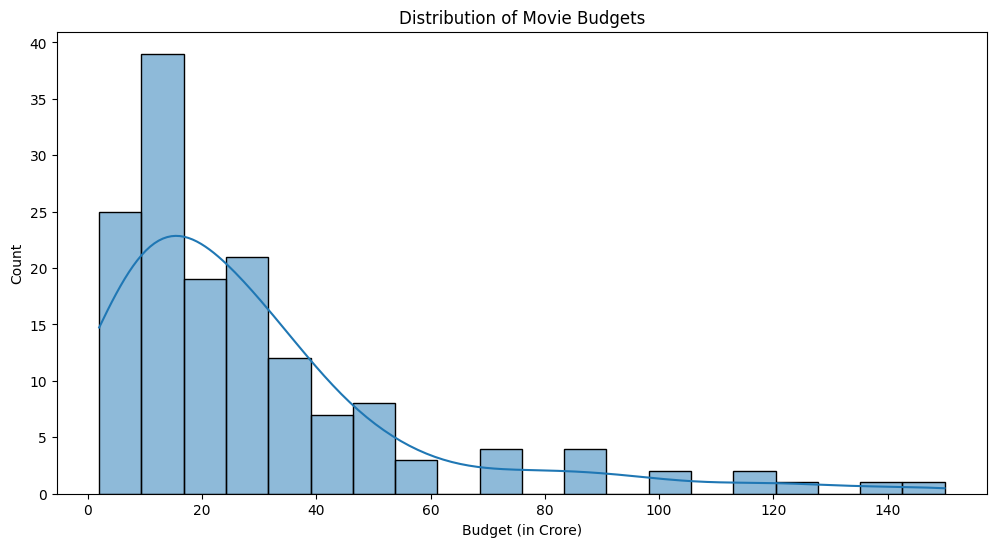

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Budget'], bins=20, kde=True)
plt.title("Distribution of Movie Budgets")
plt.ylabel("Count")
plt.xlabel("Budget (in Crore)")
plt.show()

9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

/tmp/ipython-input-31-1060536273.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comedy_roi, label='Comedy', shade=True)
/tmp/ipython-input-31-1060536273.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(drama_roi, label='Drama', shade=True)


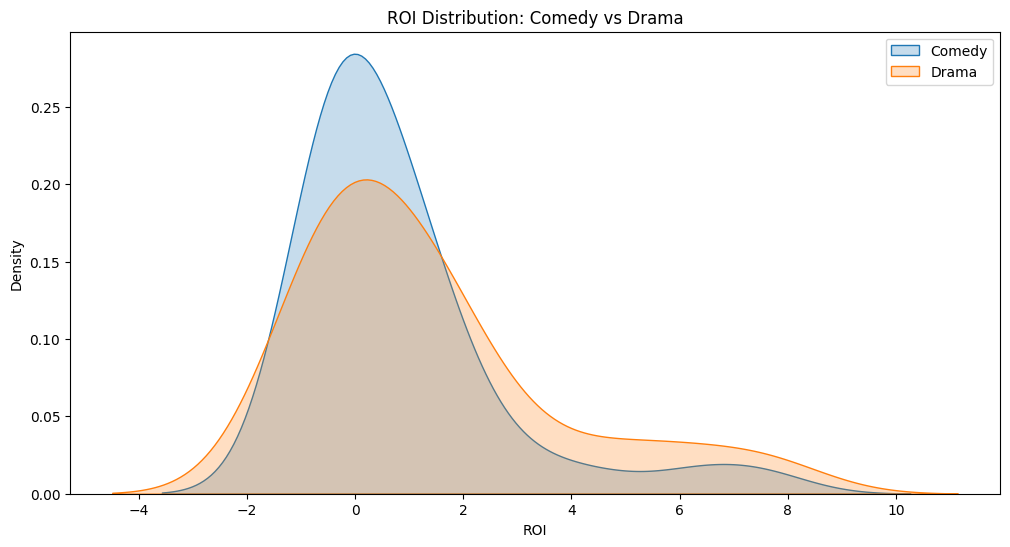

In [31]:
comedy_roi = df[df['Genre'] == 'Comedy']['ROI']
drama_roi = df[df['Genre'] == 'Drama']['ROI']

plt.figure(figsize=(12, 6))
sns.kdeplot(comedy_roi, label='Comedy', shade=True)
sns.kdeplot(drama_roi, label='Drama', shade=True)
plt.legend()
plt.title("ROI Distribution: Comedy vs Drama")
plt.show()

10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

Correlation between BoxOfficeCollection and YoutubeLikes: 0.6825165877731297 which is positive.


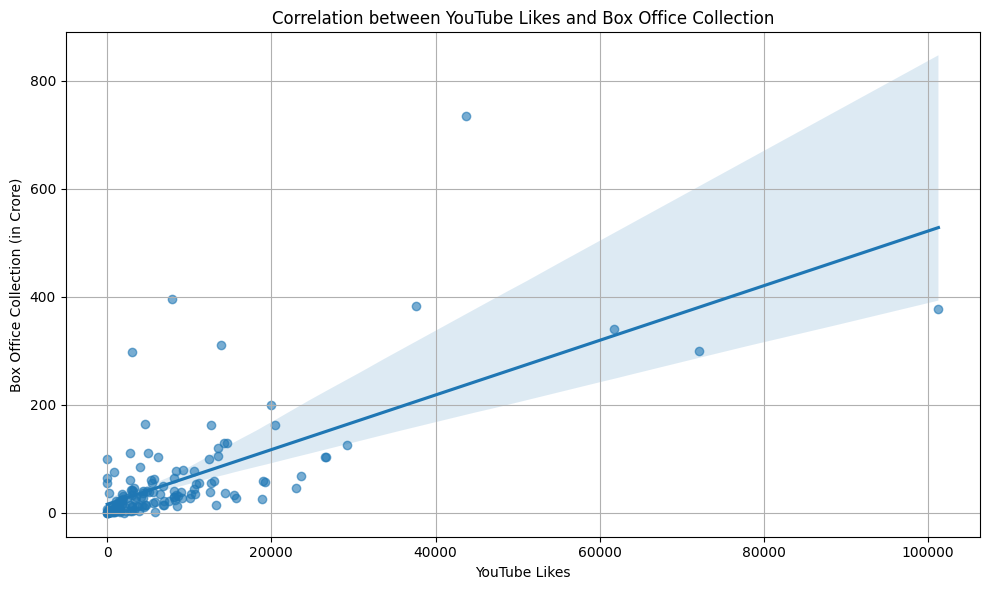

In [36]:
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("Correlation between BoxOfficeCollection and YoutubeLikes:", correlation, "which is positive.")
plt.figure(figsize=(10, 6))
sns.regplot(x='YoutubeLikes', y='BoxOfficeCollection', data=df, scatter_kws={'alpha':0.6})
plt.title('Correlation between YouTube Likes and Box Office Collection')
plt.xlabel('YouTube Likes')
plt.ylabel('Box Office Collection (in Crore)')
plt.grid(True)
plt.tight_layout()
plt.show()

11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

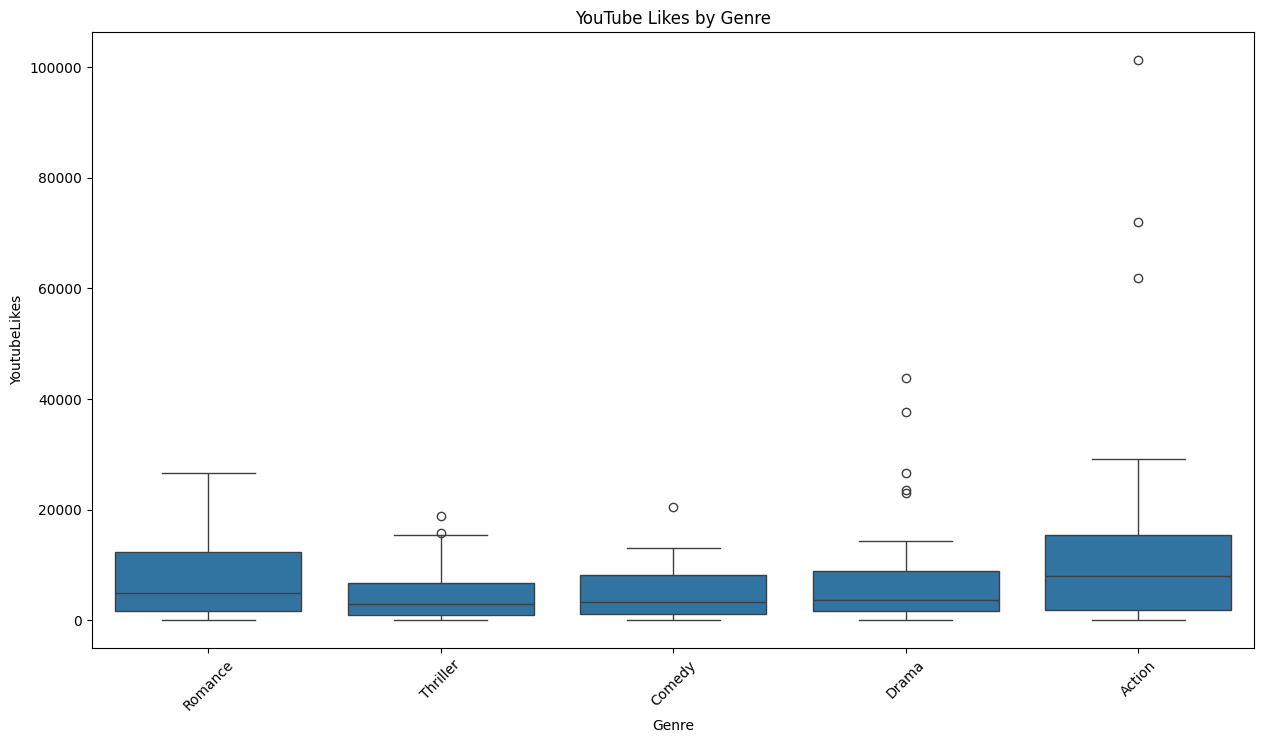

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Genre', y='YoutubeLikes')
plt.title("YouTube Likes by Genre")
plt.xticks(rotation=45)
plt.show()  # round shapes are outliers